In [55]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, select, text

engine = create_engine("sqlite:///data/cv.db")

#Utility to edit the color of plot

def change_color(color):
    mpl.rcParams['text.color'] = color
    mpl.rcParams['axes.labelcolor'] = color
    mpl.rcParams['axes.edgecolor'] = color
    mpl.rcParams['xtick.color'] = color
    mpl.rcParams['ytick.color'] = color
change_color("#00002B")

In [56]:
#Reads the database
with engine.connect() as conn:
     # Journals executes the following query: SELECT strftime('%Y',date), COUNT(id) FROM scientificpublication
     #                              WHERE publication_type='journal'
     #                              GROUP BY strftime('%Y',date)

     journals = pd.read_sql_query("""SELECT strftime('%Y',date) AS year, COUNT(id) AS count FROM scientificpublication
                                   WHERE publication_type='journal'
                                   GROUP BY strftime('%Y',date)
                                   """, conn)
     
     proceedings = pd.read_sql_query("""SELECT strftime('%Y',date) AS year, COUNT(id) AS count FROM scientificpublication
                                   WHERE publication_type='ext-abs'
                                   GROUP BY strftime('%Y',date)
                                   """, conn)
     
     preprints = pd.read_sql_query("""SELECT strftime('%Y',date) AS year, COUNT(id) AS count FROM scientificpublication
                                   WHERE publication_type='preprint'
                                   GROUP BY strftime('%Y',date)
                                   """, conn)

In [62]:
# Merge the dataframes, using the following column names and using years 2015 to 2024 as indices
# journals, proceedings

df = pd.merge(journals, proceedings, on='year', how='outer', suffixes=('_journals', '_proceedings'))

# Add year 2014 0 journals 0 proceedings
df = df.append({'year': '2014', 'count_journals': 0, 'count_proceedings': 0}, ignore_index=True)
df = df.append({'year': '2024', 'count_journals': 0, 'count_proceedings': 0}, ignore_index=True)

# Sort by year
df = df.sort_values(by='year')
df = df.set_index('year')

# Rename colums as journals, proceedings, proceedings

df = df.rename(columns={'count_journals': 'journals'})
df = df.rename(columns={'count_proceedings': 'proceedings'})

# Nan to zero
df = df.fillna(0)
df


,journals,proceedings
year,,
2013,0.0,1.0
2014,0.0,0.0
2015,1.0,2.0
2016,1.0,0.0
2017,1.0,0.0
2018,3.0,1.0
2019,1.0,4.0
2020,2.0,0.0
2021,2.0,1.0


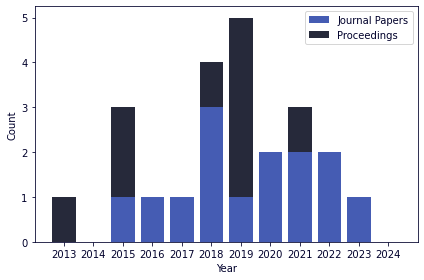

In [64]:
#Count per year
years=list(range(2013,2025))

journals = df['journals']
proceedings = df['proceedings']

#Create the plot
plt.bar(years,journals, label='Journal Papers', color="#455cb3")
plt.bar(years,proceedings, bottom=journals, label='Proceedings', color="#26293a")
# plt.bar(years,preprints, bottom=c_sum, label='Preprints', color="#6c757d")

plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='best',facecolor="white")
plt.tight_layout()
plt.savefig('papers.png'.format(years),dpi=120,transparent=True)
plt.show()